# 1. Preparing Data

In [36]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
# Import data
df = pd.read_csv('ecommerce.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [38]:
# Let's check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


Based on the output above, it is known that the dataset has 8 columns and 4870 rows. No Null values ​​are identified in the eight columns. However, it is still necessary to check all unique values ​​in all columns to ensure there are no invalid values. Before that, we need to check if there is any duplicate data.

# 2. Doing Feature Engineering

Before doing EDA, we need to do feature engineering first. This is done to handling duplicate data, missing value, unvalid data, outlier, so the EDA results can be more valid.

In [39]:
# Checking the duplicate data
data = df.copy()
duplicate_check = len(data.drop_duplicates()) / len(data)
print(duplicate_check)
if duplicate_check == 1:
  print('Tidak ada data duplicate')
else: print('Ada data duplicate')

1.0
Tidak ada data duplicate


In [40]:
# Checking the unique values in each column
for column in data.columns:
  print(f'========================{column}========================')
  print(data[column].value_counts())
  print("")
  display()

========================InvoiceNo========================
InvoiceNo
562046    8
575491    7
576339    7
578270    7
559552    6
570488    6
567656    6
554275    6
537137    5
571909    5
578068    5
570818    5
563924    5
568346    5
579516    5
579196    5
571039    5
553035    5
580727    5
570672    5
565766    5
553067    5
571653    4
569653    4
571883    4
576857    4
575152    4
580527    4
537144    4
537868    4
545530    4
576053    4
579446    4
574481    4
577504    4
572669    4
566495    4
562031    4
554098    4
560271    4
546851    4
544790    4
568066    4
566290    4
563076    4
556056    4
572741    4
574714    4
551531    4
580136    4
569803    4
578045    4
558237    4
545690    4
571046    4
544316    4
569669    4
544450    4
560444    4
567170    4
575607    4
577029    4
572103    4
572873    3
576212    3
558200    3
569894    3
539041    3
574258    3
556102    3
547372    3
549730    3
578088    3
546133    3
568050    3
544463    3
537135    3
568781  

Based on the results above, there are no missing values ​​and duplicate data. However, in the Country column, the 'Unspecified' value is identified which we need to handle. Because the variable is categorical, the handling of missing values ​​uses the mode value.

In [41]:
# Checking the percentage of missing values in Country column
missing_value_percent = 100 * (len(data[data['Country'] == 'Unspecified']) / len(data))
print(f"Missing value in Country column is {missing_value_percent} percent")

Missing value in Country column is 0.08213552361396304 percent


In [42]:
# Because the missing value is < 20 percent, it doesn't need to be dropped, but it needs to be handled
# Country column is of object type, so missing values can be handled using mode

mode_country = data[~data['Country'].isin(['Unspecified'])]['Country'].mode()[0]
print(f"The mode of the Country column is '{mode_country}'")

The mode of the Country column is 'United Kingdom'


In [43]:
# Implementation missing value using mode
data['Country'] = data['Country'].apply(lambda x: mode_country if x in ['Unspecified'] else x)

# Double check if there is still a missing value 'Unspecified'
print(f"Total missing value 'Unspecified' in the Country column is: {len(data[data['Country'] == 'Unspecified'])}")

Total missing value 'Unspecified' in the Country column is: 0


In [44]:
# Checking outlier values using descriptive statistics -> for numeric data
data[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,4870.000000,4870.000000
mean,12.945791,2.937057
std,38.145988,4.744515
min,1.000000,0.040000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,992.000000,145.000000


For initial identification of outlier values, descriptive statistics can be used by comparing the minimum, average, and maximum values. Based on the table above, the average value of the Quantity and Unit Price variables is closer to the minimum value, and very far from the maximum value. This indicates that there are outlier values ​​in both variables. We will use a graph to find out the distribution of the data.

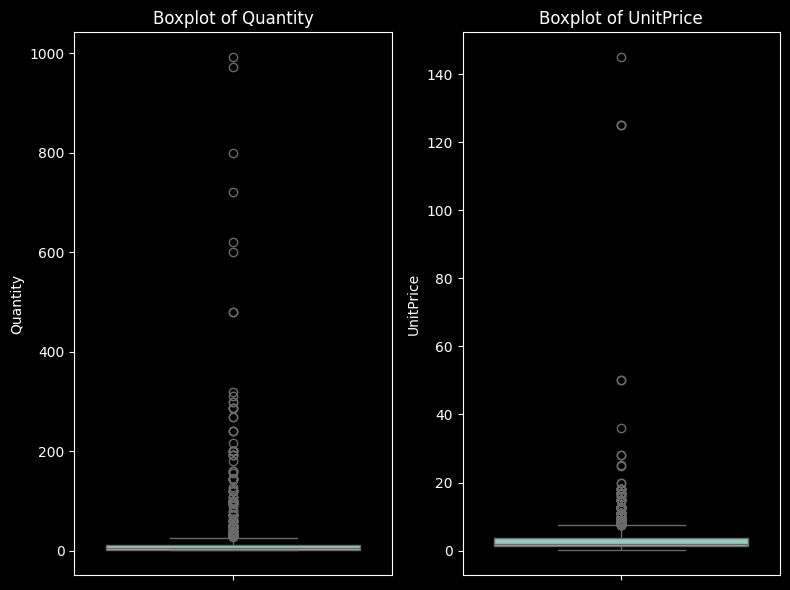

In [45]:
# Checking outlier values using boxplot -> for numeric data
numerical_var = ['Quantity', 'UnitPrice']
fig, axes = plt.subplots(ncols=len(numerical_var), figsize=(8,6))
plt.style.use('dark_background')
for i in range(0, len(numerical_var)):
  sns.boxplot(data[numerical_var[i]], ax=axes[i])
  axes[i].set_title(f'Boxplot of {numerical_var[i]}')
  plt.tight_layout()

Based on the boxplot above, outlier data was identified in the 'Quantity' and 'Unit Price' columns, so an outlier handling process is needed.

In [46]:
# Handling outlier process
def outlier(data, features):
  IQR = data[features].quantile(0.75) - data[features].quantile(0.25)
  lower_boundary = data[features].quantile(0.25) - (1.5 * IQR)
  upper_boundary = data[features].quantile(0.75) + (1.5 * IQR)
  return [lower_boundary, upper_boundary]

outlier_var = ['Quantity', 'UnitPrice']
lower_upper_boundary = {}
for column in outlier_var:
  lower_upper_boundary[column] = outlier(data, column)
  data = data[(data[column] <= lower_upper_boundary[column][1]) & (data[column] >= lower_upper_boundary[column][0])]

data.shape

(4144, 8)

After handling outliers, the dataset which initially consisted of 4870 rows, now has 4144 rows left. There are 726 rows of data that were dropped. After this, we will re-check the distribution of each numerical variable that has been handled outlier using boxplot.

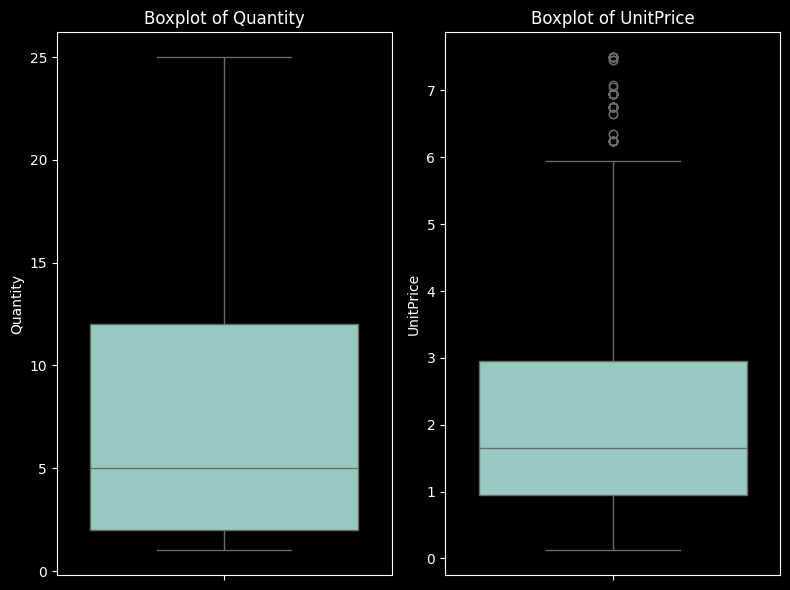

In [47]:
# Checking outlier after handling
numerical_var = ['Quantity', 'UnitPrice']
fig, axes = plt.subplots(ncols=len(numerical_var), figsize=(8,6))
plt.style.use('dark_background')
for i in range(0, len(numerical_var)):
  sns.boxplot(data[numerical_var[i]], ax=axes[i])
  axes[i].set_title(f'Boxplot of {numerical_var[i]}')
  plt.tight_layout()

There are no more outlier data that need to be dropped. In the UnitPrice column, there are still some values ​​above the upper limit of the boxplot, but these values ​​don't significantly change the data distribution so they can be ignored (no need to be dropped).

# 3. Exploratory and Explanatory Data Analysis

## EDA Question
1. Throughout 2011, when (which month) did the highest product sales occur? Mention the top 5 products that contributed. Compare it with the total sales price data.
2. Which countries have the highest sales (quantity)?
3. We know that the United Kingdom dominates sales compared to other countries. Analyze what products and when did the highest sales occur? Compare it with the Total Price issued by customers.
4. How is the relationship between unit price and quantity? Explain it.
5. Find out the 5 customers who made the most purchases.

**Note:**
1. Before answering the EDA question, we need to modify the InvoiceDate column to be able to analyze the datetime data type.
2. In addition, we need to add a 'TotalPrice' column that defines the total sales amount/total price that needs to be paid by the customer.

In [48]:
# Convert InvoiceDate column
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month_name()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2011,May
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,2011,July
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,2011,July
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,2011,July
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2011,February


In [49]:
# Adding 'TotalPrice' column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,TotalPrice
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2011,May,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,2011,July,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,2011,July,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,2011,July,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2011,February,2.55


## The Answer
### 1. Throughout 2011, when (which month) did the highest product sales occur? Mention the top 5 products that contributed. Compare it with the total sales price data.

In [50]:
# Step 1: Find the month with the highest number of products sold (Quantity)
sales_by_month = data[data['Year'] == 2011].groupby('Month')[['Quantity', 'TotalPrice']].sum().reset_index().sort_values(by='Quantity', ascending=False)
sales_by_month

,Month,Quantity,TotalPrice
9,November,4693,8055.80
10,October,3672,5775.44
11,September,3411,5282.78
1,August,2341,3778.73
5,July,2288,4018.98
8,May,2260,4120.26
7,March,2124,3716.25
0,April,1836,3234.35
6,June,1811,3068.65
3,February,1635,2855.76


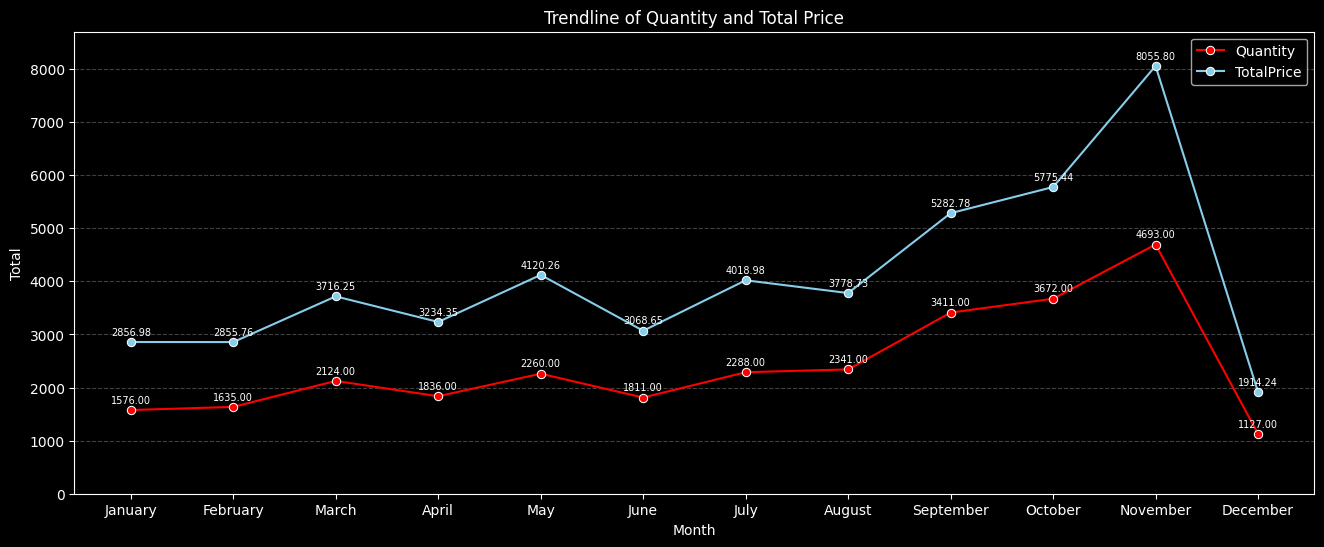

In [51]:
# Draw it on a graph and compare it with total sales price

fig, axes = plt.subplots(figsize=(16,6))
plt.style.use('dark_background')

# Sort months manually
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorted_data_by_month = sales_by_month.sort_values(by='Month', key=lambda x: x.map({v: i for i, v in enumerate(month_order)}))

# Creating a line chart
sns.lineplot(x='Month', y='Quantity', data=sorted_data_by_month, marker='o', label='Quantity', color='red')
sns.lineplot(x='Month', y='TotalPrice', data=sorted_data_by_month, marker='o', label='TotalPrice', color='skyblue')
plt.title('Trendline of Quantity and Total Price')
plt.ylabel('Total')
plt.ylim(0,8700)
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.5)

# Adding number labels to each point
for x, y in zip(sorted_data_by_month['Month'], sorted_data_by_month['Quantity']):
    plt.annotate(format(y, '.2f'), xy=(x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='white', fontsize=7)
for x, y in zip(sorted_data_by_month['Month'], sorted_data_by_month['TotalPrice']):
    plt.annotate(format(y, '.2f'), xy=(x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='white', fontsize=7)

plt.show()

In [52]:
# Step 2: Find the 5 products with the highest number of sales in the selected month (November)
top_november_code = data[(data['Year'] == 2011) & (data['Month'] == 'November')].groupby('StockCode')[['Quantity', 'TotalPrice']].sum().reset_index().sort_values(by='Quantity', ascending=False).head()
top_november_code

,StockCode,Quantity,TotalPrice
220,22577,75,21.75
412,23367,55,35.75
306,22986,50,21.00
404,23353,38,31.54
147,22197,37,41.59


In [53]:
top_november_product = data[(data['StockCode'] == '85123A') | (data['StockCode'] == '84992') | (data['StockCode'] == '23201') | (data['StockCode'] == '23215') | (data['StockCode'] == '22988')]['Description'].unique()
top_november_product

array(['SOLDIERS EGG CUP ', 'WHITE HANGING HEART T-LIGHT HOLDER',
       'JUMBO BAG ALPHABET', '72 SWEETHEART FAIRY CAKE CASES'],
      dtype=object)

**Insight:**
> Based on the output in 'Step 1', it appears that the trend of the number of products sold with the total selling price has a trend that is not much different. The monthly sales graph throughout 2011 shows an upward trend until November. The peak in November is the period with the highest number of products sold and total selling price throughout the year.

> In 'Step 2' we know that the 5 products that sold the most in November were:
1. 'Soldier Egg Cup' with product code 85123A
2. 'White Hanging Heart T-Light Holder' with product code 84992
3. 'Jumbo Bag Alphabet' with product code 23201
4. '72 Sweetheart Fairy Cake Cases' with product code 23215
5. 'Jingle Bell Heart Antique Silver' with product code 22988.

### 2. Which countries have the highest sales (quantity)?

In [54]:
# Calculate the sales amount (quantity) for each country
top_selling_country = data.groupby('Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
top_selling_country.head()

,Country,Quantity
28,United Kingdom,26452
11,Germany,1112
10,France,792
8,EIRE,733
26,Switzerland,274


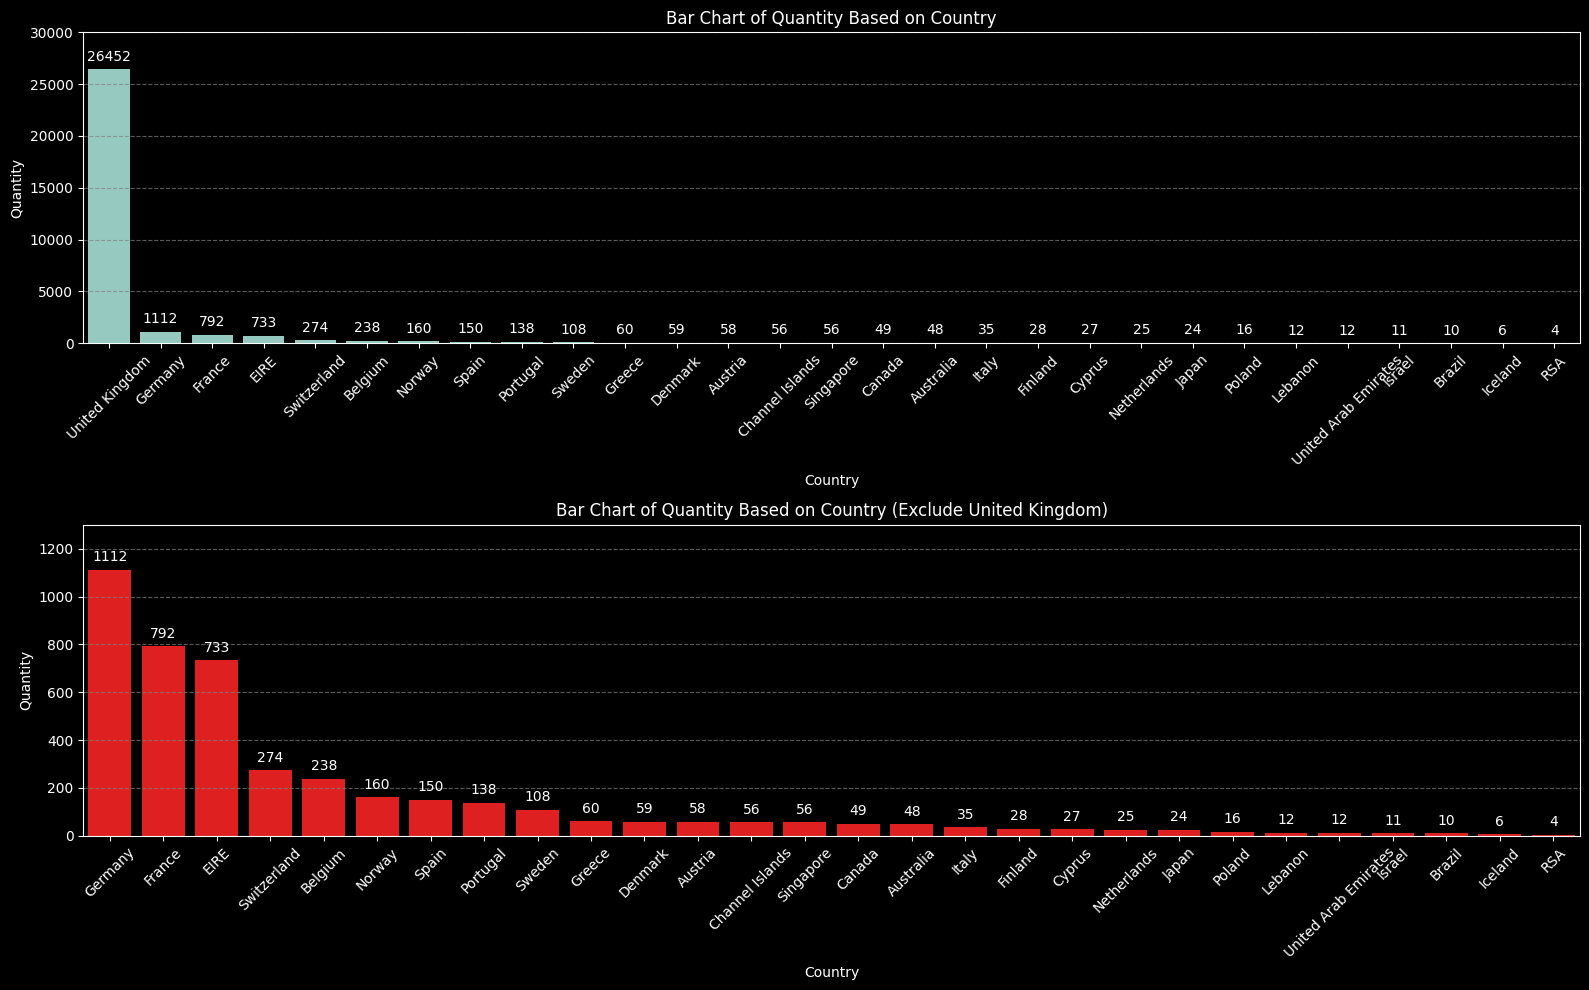

In [55]:
# Draw it on a graph

fig, axes = plt.subplots(nrows=2, figsize=(16,10))
plt.style.use('dark_background')
sns.barplot(top_selling_country, x='Country', y='Quantity', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Bar Chart of Quantity Based on Country')
axes[0].set_ylim(0, 30000)
axes[0].grid(axis='y', color='grey', linestyle='--', alpha=0.7)

sns.barplot(top_selling_country[top_selling_country['Country'] != 'United Kingdom'], x='Country', y='Quantity', ax=axes[1], color='red')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Bar Chart of Quantity Based on Country (Exclude United Kingdom)')
axes[1].set_ylim(0, 1300)
axes[1].grid(axis='y', color='grey', linestyle='--', alpha=0.7)

for i in range(0,2):
  for p in axes[i].patches:
    axes[i].annotate(text=format(p.get_height(), '.0f'),
                       xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points',
                       color='white')

plt.tight_layout()
plt.show()

**Insight:**
> The United Kingdom dominates in terms of countries with the largest number of product sales, reaching 26,452 units. In second place is Germany with a total of 1,112 sales, far below the United Kingdom. Then other countries with total sales above 500 are France and EIRE (Ireland).

### 3. We know that the United Kingdom dominates sales (quantity) compared to other countries. Analyze what products and when did the highest sales occur? Compare it with the Total Price issued by customers.

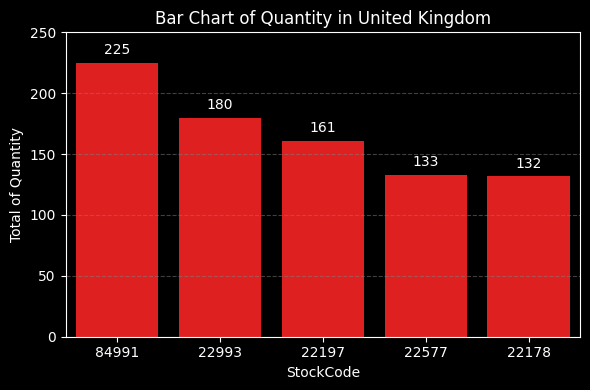

In [56]:
# Top 5 products with the highest number of sales (quantity) in the UK
uk_top_product_quantity = data[data['Country'] == 'United Kingdom'].groupby('StockCode')[['Quantity', 'UnitPrice', 'TotalPrice']].sum().reset_index().sort_values(by='Quantity', ascending=False).head(5)


# Draw it on a graph
fig, axes = plt.subplots(figsize=(6,4))
plt.style.use('dark_background')
sns.barplot(uk_top_product_quantity, x='StockCode', y='Quantity', color='red')
plt.title('Bar Chart of Quantity in United Kingdom')
plt.ylim(0,250)
plt.ylabel('Total of Quantity')
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.5)

for p in axes.patches:
    axes.annotate(text=format(p.get_height(), '.0f'),
                       xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points',
                       color='white')

plt.tight_layout()
plt.show()

In [57]:
# Description of the 5 top products (84991, 22993, 22197, 22577, and 22178)
uk_top_product_desc = data[(data['StockCode'] == '84991') | (data['StockCode'] == '22993') | (data['StockCode'] == '22197') | (data['StockCode'] == '22577') | (data['StockCode'] == '22178')]['Description'].unique()
uk_top_product_desc

array(['VICTORIAN GLASS HANGING T-LIGHT', 'SMALL POPCORN HOLDER',
       'SET OF 4 PANTRY JELLY MOULDS', '60 TEATIME FAIRY CAKE CASES',
       'WOODEN HEART CHRISTMAS SCANDINAVIAN', 'POPCORN HOLDER'],
      dtype=object)

**Insight**:
> Based on the graph above, it can be concluded that the top 5 products with the highest total sales (quantity) are products with codes 84991, 22993, 22197, 22577, and 22178. These products include Victorian Glass Hanging T-Light, Small Popcorn Holder, Set of 4 Pantry Jelly Moulds, 60 Teatime Fairy Cake Cases, Wooden Heart Chrismas Scandinavian, and Popcorn Holder.

> *note: there are 6 product names because there are product codes that refer to two product names

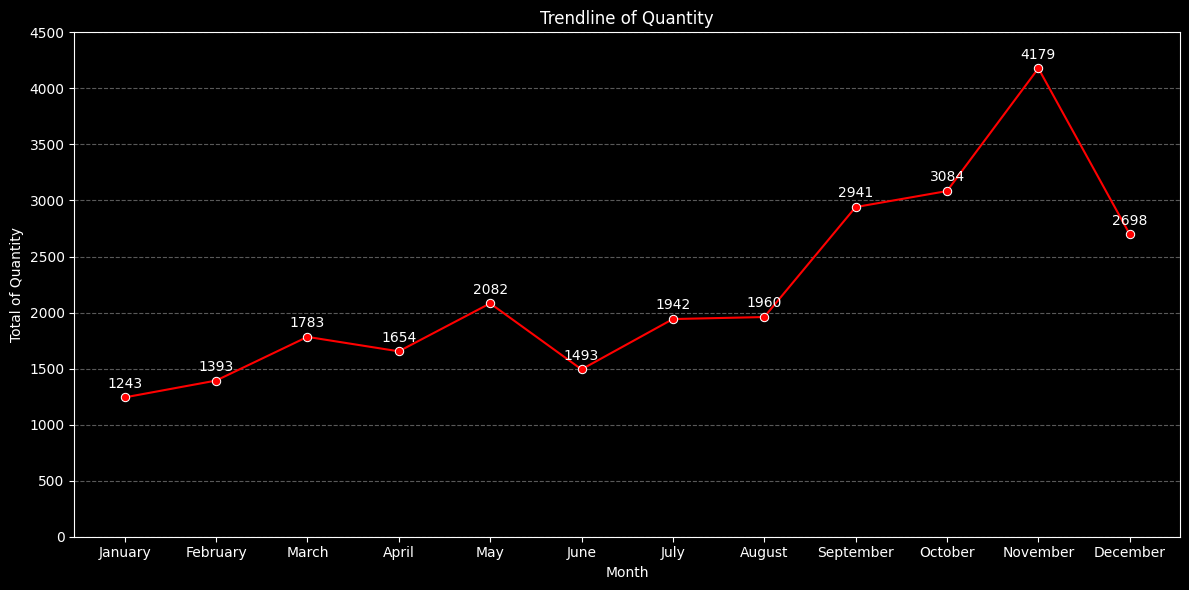

In [58]:
# Total sales (quantity) for each month
uk_top_month = data[data['Country'] == 'United Kingdom'].groupby('Month')[['Quantity', 'TotalPrice']].sum().reset_index().sort_values(by='Quantity', ascending=False)


# Draw it on a graph
fig, axes = plt.subplots(figsize=(12,6))
plt.style.use('dark_background')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorted_uk_top_month = uk_top_month.sort_values(by='Month', key=lambda x: x.map({v: i for i, v in enumerate(month_order)}))

sns.lineplot(data=sorted_uk_top_month, x='Month', y='Quantity', color='red', marker='o')
plt.title('Trendline of Quantity')
plt.ylabel("Total of Quantity")
plt.ylim(0, 4500)
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.7)

for x, y in zip(sorted_uk_top_month['Month'], sorted_uk_top_month['Quantity']):
    plt.annotate(text=y,
                  xy=(x, y),
                  textcoords="offset points",
                  xytext=(0, 7),
                  ha='center',
                  color='white')

plt.tight_layout()
plt.show()

**Insight:**
> The highest product sales in the UK occurred in November. Overall, there was an upward trend in the number of products sold from January to November 2011, before a significant decline at the end of the year (December). This needs to be considered to analyze the factors causing the almost 50% decline.

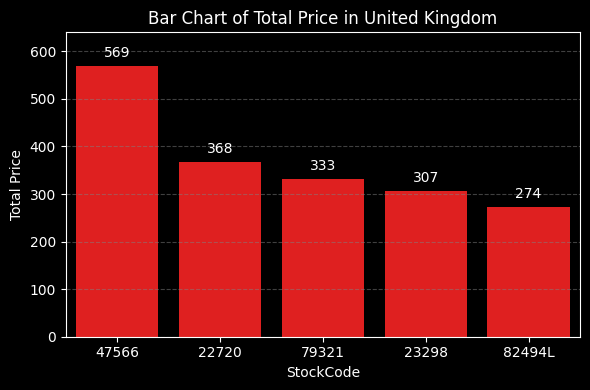

In [59]:
# Next, we will compare the quantity with the total price.
# Top 5 products with the highest number of total price in the UK
uk_top_product_price = data[data['Country'] == 'United Kingdom'].groupby('StockCode')[['TotalPrice', 'Quantity', 'UnitPrice']].sum().reset_index().sort_values(by='TotalPrice', ascending=False).head(5)


# Draw it on a graph
fig, axes = plt.subplots(figsize=(6,4))
plt.style.use('dark_background')
sns.barplot(uk_top_product_price, x='StockCode', y='TotalPrice', color='red')
plt.title('Bar Chart of Total Price in United Kingdom')
plt.ylim(0,640)
plt.ylabel('Total Price')
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.5)

for p in axes.patches:
    axes.annotate(text=format(p.get_height(), '.0f'),
                       xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points',
                       color='white')

plt.tight_layout()
plt.show()

**Insight:**
> If the top 5 products with the highest sales (quantity) are compared with their total price, there is a difference in the top 5 results based on the total price. This shows that the product with the highest sales (quantity) does not necessarily contribute the highest total price. If associated with the company's profit, this can be interesting knowledge to find the right strategy in optimizing products that contribute high profits, and can be associated with target market analysis of these products.

### 4. How is the relationship between unit price and quantity? Explain it.

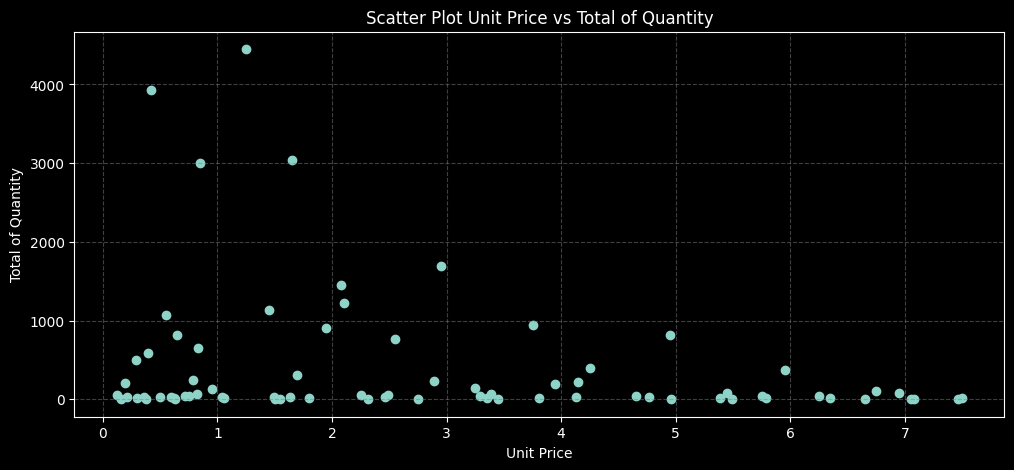

In [60]:
# Create a tabulation table between Quantity and Unit Price
quantity_by_unitprice = data.groupby('UnitPrice')['Quantity'].sum().reset_index()

# Draw it on a graph
plt.subplots(figsize=(12,5))
plt.style.use('dark_background')
plt.scatter(quantity_by_unitprice['UnitPrice'], quantity_by_unitprice['Quantity'])
plt.title('Scatter Plot Unit Price vs Total of Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Total of Quantity')
plt.grid(color='gray', linestyle='--', alpha=0.5)
plt.show()

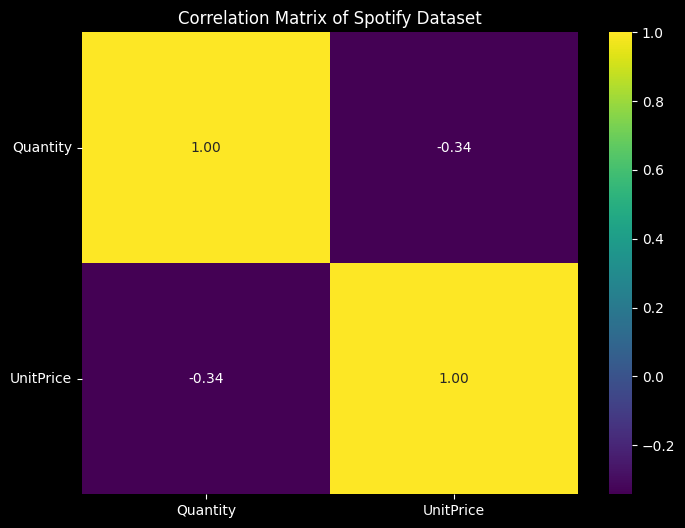

In [61]:
# Calculate the correlation matrix between Quantity and Unit Price
correlation_matrix = data[['Quantity', 'UnitPrice']].corr()

# Draw it on a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Correlation Matrix of Spotify Dataset')
plt.show()

**Insight:**
> It appears that the correlation pattern between Unit Price and Quantity has a negative correlation, meaning that an increase in Unit Price will be followed by a decrease in Quantity, and vice versa. Based on the scatter plot above, it appears that the highest quantity occurs in products with low prices. The more expensive a product is, the smaller the sales volume (total quantity) will be. This finding can be utilized by companies by looking at sales trends in the market where they can further identify the target market for several products so that they can increase sales in the future. However, to find out more specifically about the magnitude of the correlation, we will calculate the correlation value and visualize it in a heatmap.

> Based on the heatmap above, it can be seen that the correlation between UnitPrice and Quantity is 0.34 with a negative correlation type, meaning that if UnitPrice increases, Quantity decreases, and vice versa. The correlation between the two variables is relatively weak, the same as the findings in the scatter plot. Weak here means that products with low Unit Prices are not always sold a lot (high Quantity), and/or products with high Unit Prices are not always sold a little (low Quantity). It can be seen in the scatter plot above that there are still many products with low prices that are actually sold a little. This further weakens the correlation between Unit Price and Quantity. This finding can be important information for companies to pay attention to customer interest and habits in purchasing company products so that in the future it can be used to formulate strategies to increase sales and profits.

### 5. Find out the 5 customers who made the most purchases.

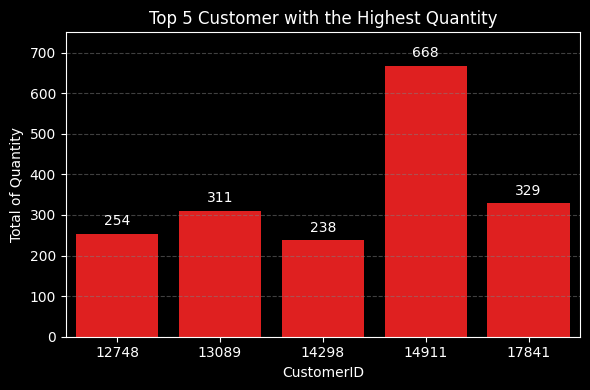

In [62]:
# Customer with the highest number of purchases (Quantity)
top_quantity_cust = data.groupby('CustomerID')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head()

# Draw it on a graph
fig, axes = plt.subplots(figsize=(6,4))
plt.style.use('dark_background')
sns.barplot(top_quantity_cust, x='CustomerID', y='Quantity', color='red')
plt.title('Top 5 Customer with the Highest Quantity')
plt.ylim(0,750)
plt.ylabel('Total of Quantity')
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.5)

for p in axes.patches:
    axes.annotate(text=format(p.get_height(), '.0f'),
                       xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points',
                       color='white')

plt.tight_layout()
plt.show()

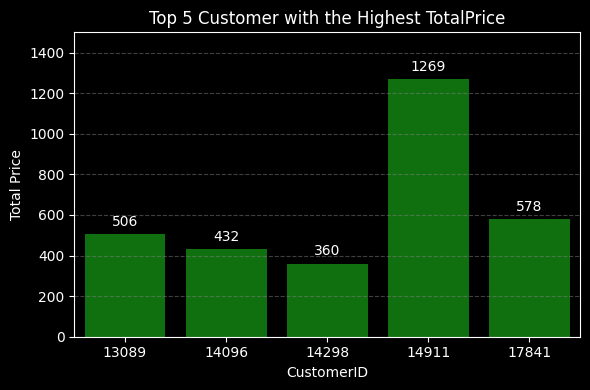

In [63]:
# Customer with the highest spending (Total Price)
top_price_cust = data.groupby('CustomerID')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice', ascending=False).head()

# Draw it on a graph
fig, axes = plt.subplots(figsize=(6,4))
plt.style.use('dark_background')
sns.barplot(top_price_cust, x='CustomerID', y='TotalPrice', color='green')
plt.title('Top 5 Customer with the Highest TotalPrice')
plt.ylim(0,1500)
plt.ylabel('Total Price')
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.5)

for p in axes.patches:
    axes.annotate(text=format(p.get_height(), '.0f'),
                       xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points',
                       color='white')

plt.tight_layout()
plt.show()

**Insight:**
1. The results of the top 5 customers can be used as a strategy to maintain customer loyalty, for example by giving special rewards
2. The top 5 customers with the most product purchases include customers with ID numbers 14911, 17841, 13089, 12748, and 14298
3. There is a slight difference in the top 5 customers with the highest spending. This shows that there are types of customers who are also interested in high-priced products, even though their purchase frequency is not the highest
4. Both findings can be adjusted to the needs of the team whether they want to know the customers with the most product purchases (quantity) or the customers with the highest spending (Total Price).

`------------------------------------------------- End of Document, Thank You -------------------------------------------------`